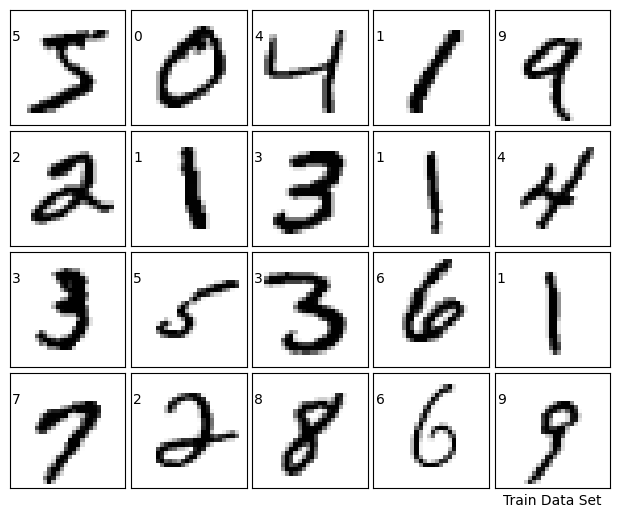

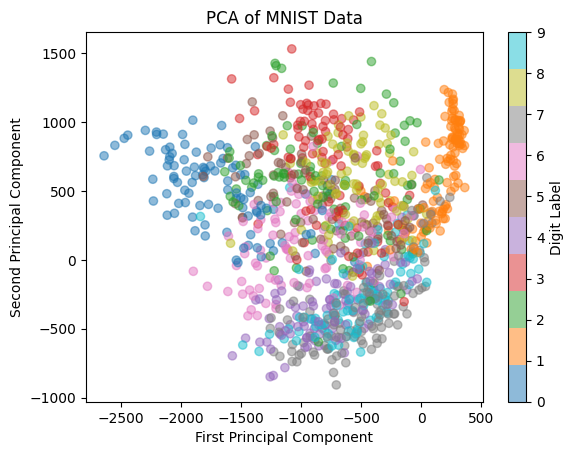

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

def pca(X):
    # X matrisinin sütunlarının ortalamasını hesapla
    mean = np.mean(X, axis=0)

    # Ortalama değeri çıkararak veriyi merkezle
    X_centered = X - mean

    # SVD kullanarak matrisi ayrıştır
    U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Vt'nin transpozesi, ana bileşen vektörleridir
    vectors = Vt.T

    # s, özdeğerlerin kareköküdür; karelerini alarak gerçek özdeğerleri elde ederiz
    weights = s**2 / (len(X) - 1)

    return mean, weights, vectors

# MNIST veri setini yükle
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))
plt.xlabel('Train Data Set')
plt.show()
# İlk 1000 eğitim görüntüsünü kullan
X = train_images[:1000].reshape(1000, 28*28)  # Görüntüleri düzleştir

# PCA fonksiyonunu uygula
mean, weights, vectors = pca(X)

# İlk iki ana bileşeni kullanarak 2D'de veriyi göster
pc1 = X.dot(vectors[:, 0])
pc2 = X.dot(vectors[:, 1])

plt.scatter(pc1, pc2, c=train_labels[:1000], cmap='tab10', alpha=0.5)
plt.colorbar(label='Digit Label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of MNIST Data')
plt.show()


This image demonstrates how handwritten digits from the MNIST dataset have been reduced to two dimensions using PCA (Principal Component Analysis). In the visualization, each point represents a handwritten digit image, and the colors of the points indicate the actual digits (from 0 to 9).

# Insights from the Image:

**Data Clustering**: Points of different colors (digits) form clusters within the visual space. For example, blue points (digit 0) are grouped in the lower left corner, while red points (digit 1) are gathered in a different area. This shows that PCA can capture the fundamental features of the digits, bringing similar digits together.
Dimension Reduction: The 2D visualization created using the first two principal components shows that data originally consisting of 784 features (28x28 pixels) can be effectively reduced to a much lower dimension. This preserves a major part of the variance in the dataset.
Data Interpretation: The distances and shapes of the clusters provide information about how different digits are separated from each other and which digits exhibit similar characteristics. For example, the proximity of 0 and 6 suggests that these two digits might share similar visual features.
# Applications and Outcomes:

**Data Visualization**: PCA is highly useful for visualizing high-dimensional datasets. This helps in understanding the structural relationships and characteristics within the data more easily.
Preprocessing for Classification: PCA can be used to accelerate the training process of classification models and enhance their performance. Training with fewer features not only saves time but also improves the model's ability to generalize.
This image is a fine example of how PCA can meaningfully simplify high-dimensional datasets and how this simplified data can be utilized in machine learning applications.

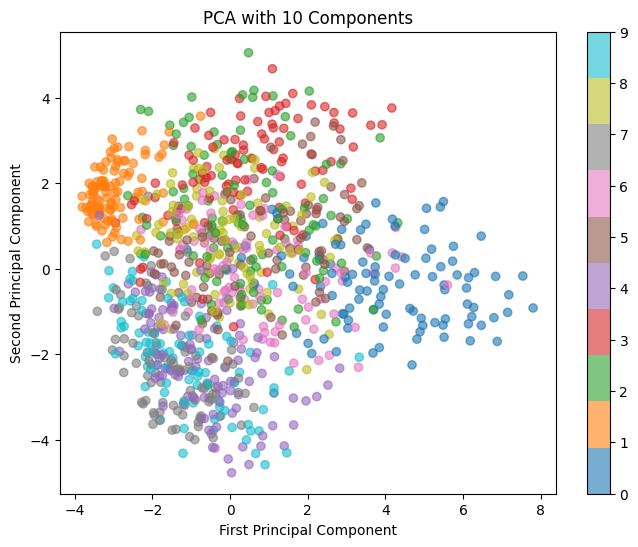

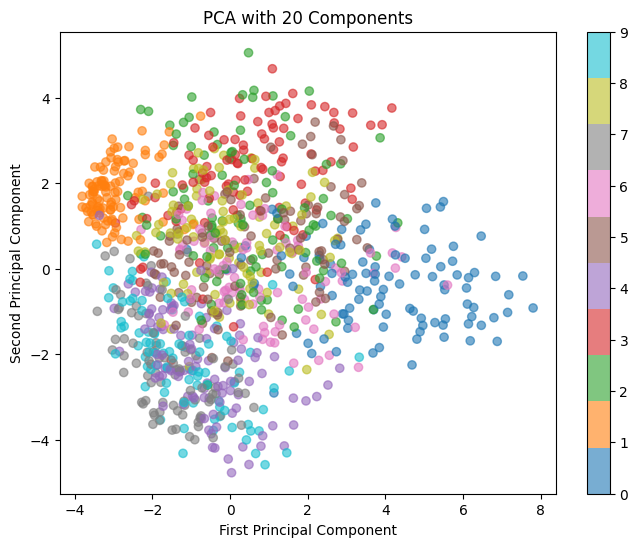

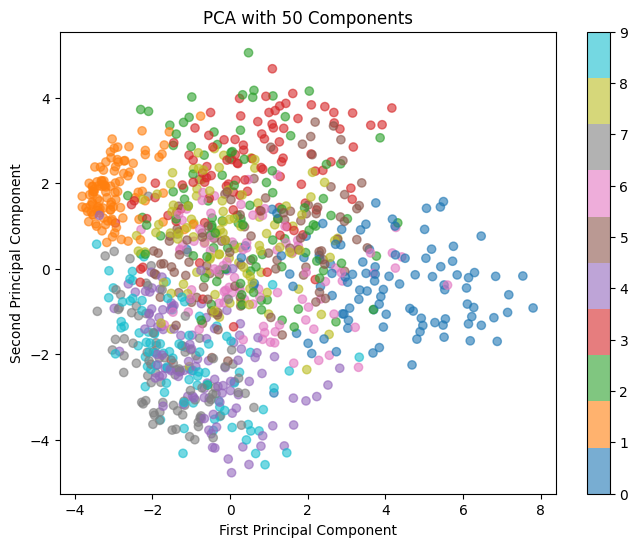

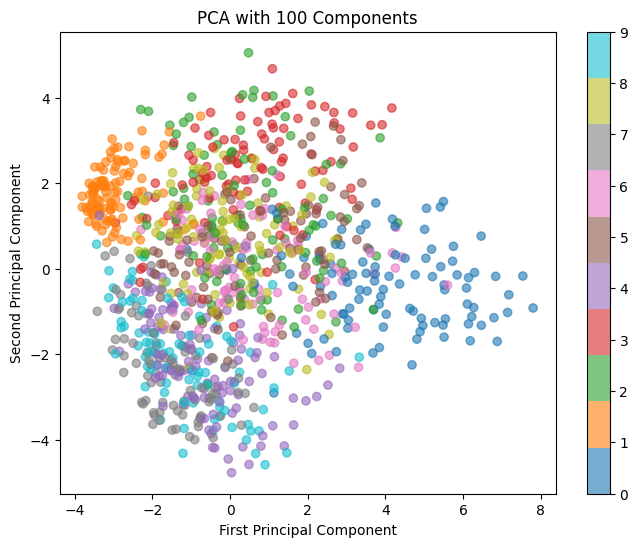

Mean accuracy for 10 components: 0.9098
Mean accuracy for 20 components: 0.9455
Mean accuracy for 50 components: 0.9498
Mean accuracy for 100 components: 0.9465


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten and normalize data
X_train = train_images.reshape(-1, 784) / 255.0
y_train = train_labels

# Randomly select 1000 samples from the dataset
indices = np.random.choice(len(X_train), 1000, replace=False)
X_sample = X_train[indices]
y_sample = y_train[indices]

# Initialize the PCA model and fit it with different component numbers
components = [10, 20, 50, 100]  # Different component counts
for n_components in components:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_sample)

    # Visualize the first two main components
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.6)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar()
    plt.title(f'PCA with {n_components} Components')
    plt.show()

# Classifier training and cross validation after PCA
results = {}
for n_components in components:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_train)

    # Initialize and train Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Evaluate the model's performance with cross-validation
    scores = cross_val_score(rf, X_pca, y_train, cv=5)
    results[n_components] = scores.mean()
    print(f'Mean accuracy for {n_components} components: {scores.mean():.4f}')

The image above shows the MNIST dataset reduced to two dimensions using PCA with 100 principal components. Each point represents a handwritten digit image, and the colors of the points indicate the actual digits (from 0 to 9).

# Function and Output of the Code

*The code starts by loading and flattening the MNIST dataset and normalizing the data. It then reduces the data to 100 principal components using PCA and visualizes this reduced data using the first two components. This helps us understand how PCA transforms the data and distinguishes between different digits.
*Finally, after applying PCA to the data, a Random Forest classifier is trained with different numbers of components, and the model's accuracy is assessed using cross-validation. The statement below the image, 'Mean accuracy for 10 components: 0.9098,' indicates the average accuracy obtained using 10 components. This metric measures the model's classification success and demonstrates the potential of PCA to enhance classification performance.

# Insights from the Visual Output

**Data Distribution**: The data are displayed in various colors across two principal components. The positions of the points demonstrate how well PCA has captured the fundamental characteristics of each digit and how it represents them in two-dimensional space. The relative positions of the different colored groups (digits) provide information about PCA's ability to distinguish these digits.

**Clustering Tendency**: Some digits (for example, the blue-colored 0s) are distinctly separated from others, while some digits (like the red 1s and pink 2s) may show a more mixed distribution. This indicates that PCA can distinguish some digits better than others.

**Dimension Reduction Performance:** Using 100 components allows the original data to be represented with many fewer dimensions while still preserving the main structural features. However, using more components generally results in better separation and cleaner clustering.
